In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
from datetime import datetime

In [10]:
#climate = pd.read_csv("../climate_classifier/scored_data/ft_meetings_climate_all_v2.1.csv")
#non_climate = pd.read_csv("../climate_classifier/scored_data/ft_meetings_non_climate_all_v2.1.csv")
all = pd.read_pickle("../climate_classifier/scored_data/ft_meetings_total_2012-2022_2.1.pkl")
climate = all[all["y_pred"]=="climate"]
non_climate = all[all["y_pred"]=="non-climate"]
print(len(climate))
print(len(non_climate))
print(len(all))
climate.head(5)

7425
208479
215904


,speaker,politician,party,text,date,y_pred
0,Transportministeren Henrik Dam Kristensen,Henrik Dam Kristensen,(S),"Jeg synes, det er lidt ærgerligt, at hr. Lars ...",2012-10-03,climate
1,Lars Christian Lilleholt (V),Lars Christian Lilleholt,(V),Det får jo ganske alvorlige konsekvenser både ...,2012-10-03,climate
2,Ellen Trane Nørby (V),Ellen Trane Nørby,(V),"Jeg tror i hvert fald, at det ofte er sådan fo...",2012-10-04,climate
3,Magnus Heunicke (S),Magnus Heunicke,(S),"Altså, det er jo svært at blive enig, jeg tror...",2012-10-04,climate
4,Kisser Franciska Lehnert (LA),Kisser Franciska Lehnert,(LA),Tak. Nu kalder Enhedslisten sig jo for et arbe...,2012-10-04,climate


In [10]:
climate.drop(columns='Unnamed: 0', inplace=True)
non_climate.drop(columns='Unnamed: 0', inplace=True)

In [11]:
frames = [climate, non_climate]
full = pd.concat(frames)

### Climate Temporal Dynamics for the Meeting data

1. Convert date to datetime
2. Try to group by months or quarters to get a an aggregated view of when there has been the most climate fuzz going on over time

In [12]:
climate['text'][3]

3    Altså, det er jo svært at blive enig, jeg tror...
3    Det der med at udstikke garantier i forhold ti...
Name: text, dtype: object

In [18]:
climate["date"] = pd.to_datetime(climate['date'])
climate.head(1)

C:\Users\COBOD\AppData\Local\Temp\ipykernel_8888\3327704326.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climate["date"] = climate["date"].str.replace("-", "")


,speaker,politician,party,text,date,y_pred
0,Transportministeren Henrik Dam Kristensen,Henrik Dam Kristensen,(S),"Jeg synes, det er lidt ærgerligt, at hr. Lars ...",20121003,climate


In [19]:
stacked = climate.groupby(['party', climate['date'].dt.to_period('Y')],axis=(0)).count()

stacked = stacked[['text']]

stacked.rename({'text':'quotes'}, inplace=True, axis=1)

stacked = stacked[0:-6]


stacked.reset_index(inplace=True)


#stacked.reset_index(inplace=True)

# stacked.set_index('date', inplace=True)

# stacked
lst = [i for i in stacked['party'].unique()]

view = stacked[stacked.party == lst[0]]
view = view.set_index('date')[['quotes']]
view.rename({'quotes':lst[0]}, axis=1)
view = view.transpose()



AttributeError: Can only use .dt accessor with datetimelike values

In [257]:
# Creating the template to append the rest
full_view = stacked[stacked.party == lst[1]]
full_view = full_view.set_index('date')[['quotes']]
full_view.rename({'quotes':lst[1]}, axis=1, inplace= True)
full_view = full_view.transpose()

In [297]:
full_view = pd.DataFrame()

for i in lst:
    view = stacked[stacked.party == i]
    view = view.set_index('date')[['quotes']]
    view = view.rename({'quotes':i}, axis=1).transpose()
    #print(view)
    full_view = full_view.append(view)
    
#full_view.reset_index(inplace=True)
full_view.rename({'date':'party'}, axis=0)

full_view = full_view.transpose()

In [299]:
# Taking out some the smaller parties
full_view.drop(['(NQ)', '(NB)', '(JF)', '(SIU)', '(SP)', '(T)', '(UFG)', '(IA)', '(KD)'], axis=1, inplace=True)

In [300]:
full_view

,(ALT),(DF),(EL),(KF),(LA),(RV),(S),(SF),(V)
date,,,,,,,,,
2012,NaN,7.0,14.0,1.0,17.0,15.0,13.0,8.0,7.0
2013,NaN,22.0,60.0,15.0,19.0,41.0,37.0,24.0,52.0
2014,NaN,51.0,78.0,27.0,20.0,53.0,63.0,38.0,77.0
2015,51.0,67.0,158.0,35.0,56.0,56.0,68.0,77.0,122.0
2016,157.0,45.0,146.0,29.0,58.0,55.0,86.0,63.0,157.0
2017,152.0,51.0,137.0,38.0,58.0,38.0,64.0,58.0,143.0
2018,111.0,52.0,76.0,36.0,41.0,39.0,116.0,39.0,151.0
2019,185.0,66.0,135.0,45.0,55.0,88.0,138.0,66.0,206.0
2020,97.0,85.0,157.0,50.0,59.0,152.0,303.0,159.0,145.0


<AxesSubplot:xlabel='date'>

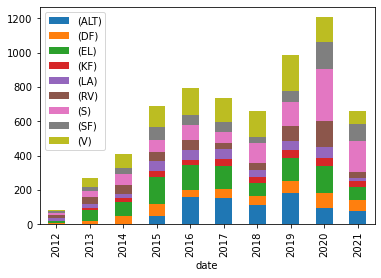

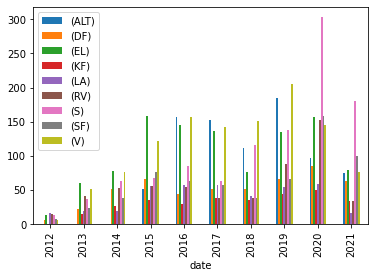

In [293]:
#Raw view 
full_view.plot(kind="bar", stacked=True)
full_view.plot(kind='bar')

In [54]:
climate['date'] = pd.to_datetime(climate['date'])
temporal_raw = climate.groupby(climate['date'].dt.to_period('Q')).agg({'text': 'count'})



,text
date,
2012Q4,84
2013Q1,53
2013Q2,132
2013Q4,88
2014Q1,99
2014Q2,204
2014Q3,1
2014Q4,107
2015Q1,177


In [14]:
temporal_raw['qa'] = temporal_raw.index
temporal_raw['qa'] = temporal_raw['qa'].apply(lambda x: str(x))

In [45]:
q3s = temporal_raw[temporal_raw.qa.str.contains("Q3")].index
temporal_nq3 = temporal_raw.drop(q3s)


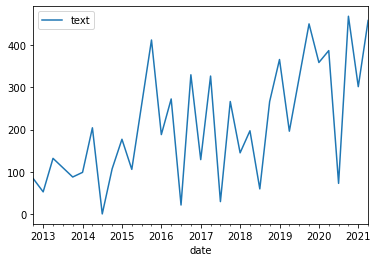

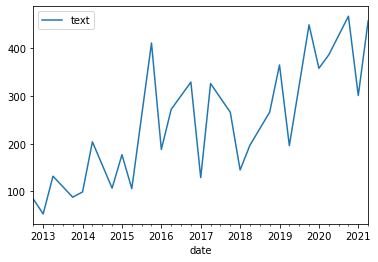

In [16]:
temporal_raw.plot()
temporal_nq3.plot()
plt.show()

# barplots instead!

In [17]:
full['date'] = pd.to_datetime(full['date'])
full.drop(columns='index', inplace=True)


In [18]:
full['climate'] = full['y_pred'].apply(lambda x: 1 if x=="climate" else 0)

In [19]:
full['non-climate'] = full['y_pred'].apply(lambda x: 1 if x=="non-climate" else 0)

In [20]:
len(full[(full['text'].str.contains("covid")) & (full['y_pred']=='climate')])

30

In [316]:
quarterly = full.groupby(full['date'].dt.to_period('Q')).agg({'climate': 'sum', 'non-climate':'sum'})
quarterly['percentage_climate'] = quarterly.apply(lambda x: (x['climate']/(x['climate']+x['non-climate']))*100, axis=1)

view = quarterly.drop(columns=['climate', 'non-climate'])

### Temporal Dynamics

In [318]:
yearly = full.groupby(full['date'].dt.to_period('Y')).agg({'climate': 'sum', 'non-climate':'sum'})
yearly['percentage_climate'] = yearly.apply(lambda x: (x['climate']/(x['climate']+x['non-climate']))*100, axis=1)

view2 = yearly.drop(columns=['climate', 'non-climate'])

In [319]:
view2

,percentage_climate
date,
2012,1.171875
2013,1.479434
2014,2.323347
2015,3.455831
2016,2.915169
2017,3.045418
2018,3.195102
2019,5.076397
2020,4.472309


<AxesSubplot:title={'center':'Overall Distribution of Climate Quotes'}, xlabel='date', ylabel='% climate quotes'>

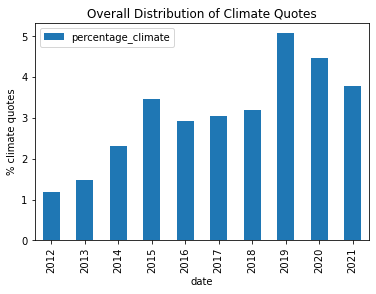

In [321]:
view2.plot(kind='bar', title='Overall Distribution of Climate Quotes', ylabel="% climate quotes")

In [322]:
#view2.percentage_climate

We see that the 3rd quarter has fewer quotes and meetings because of the summer holidays. On the lower data_sample there seem to be spikes on climate, but the overall data level is also lower here. This could cause a bias in the representation, as smaller fallouts will have an influence on the percentage of quotes.
Hence we will have to normalize for the months that